In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import os
import os.path
from csv import reader
from networkx.algorithms import approximation
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import MultiLabelBinarizer

# Parameters

### Functions

In [2]:
# Makes a table
def make_df(data,str_inflations,str_graphlets,title):
    d = data
    print(title)
    return pd.DataFrame(np.array(d),columns=str_inflations,index = str_graphlets)

# turns a list of numbers into a list of strings, can add a prefix or suffix to them
def list_of_strings(list,prefix='',suffix=''):
    return_list = []
    for item in list:
        return_list.append(prefix+str(item)+suffix)
    return return_list

### PPI

In [4]:
# Makes lists that count the number of clusterss & size of the largest cluster for each graphlet. 
# Used in later blocks to make parameter sweep plots

interact = 'ppi'
outdir_beginning = '../summer-2022/ppi_out/'

ppi_largest_cluster_lengths = []
ppi_number_of_clusters = []

inflations = [3.0]
#[1.2, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.5, 5.0]

for graphlet in list(range(30)):
    ith_graphlet_lengths = []
    ith_cluster_lengths = []
    for inflation in inflations:
    
        
        access_file = outdir_beginning + 'G' + str(graphlet) + '/intermed_G' +str(graphlet)+ '.txt'
        new_file_name = outdir_beginning + 'inflation_tests/' + 'G' + str(graphlet) + '_I' + str(inflation) + '_2'
        
      

        if os.path.exists(new_file_name) == False:
            print("Running mcl for G"+str(graphlet))
            os.system("mcl " +access_file+ " -I "+str(inflation)+" --abc -o " +new_file_name)
        

        list_of_lists = []
        cluster_num = 0
        Gi = open(new_file_name, "r")
        for line in Gi:
            cluster_num += 1
            stripped_line = line.strip()
            line_list = stripped_line.split()
            list_of_lists.append(line_list)
        Gi.close()

        largest_cluster_lenth = len(list_of_lists[0])
        ith_graphlet_lengths.append(largest_cluster_lenth)

        ith_cluster_lengths.append(cluster_num)
    ppi_largest_cluster_lengths.append(ith_graphlet_lengths)
    ppi_number_of_clusters.append(ith_cluster_lengths)

Running mcl for G0


................[mcl] new tab created
[mcl] pid 2283
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.22 0.98/0.00/7.57 72.76 30.55 30.55  46
  2  ................... 168.01 56.10 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.54 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.70  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   1.29  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   1.16  0.01 1.00/0.75/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  .

Running mcl for G1


..............[mcl] new tab created
[mcl] pid 2286
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.37 0.98/0.00/7.57 72.76 30.55 30.55  46
  2  ................... 168.01 54.66 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.24 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.07 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.01 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G2


..........[mcl] new tab created
[mcl] pid 2301
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 189.11  3.15 1.12/0.00/7.94 64.43 27.10 27.10  68
  2  ................... 169.62 37.25 0.64/0.08/1.73 12.45 0.17 4.66  99
  3  ...................  37.69  2.21 0.74/0.06/3.61 17.51 0.08 0.39  96
  4  ...................  18.10  0.08 0.89/0.20/1.81 2.45 0.24 0.09   4
  5  ...................   3.34  0.02 0.96/0.33/1.46 1.17 0.48 0.04   0
  6  ...................   1.19  0.01 0.99/0.41/1.58 1.01 0.71 0.03   0
  7  ...................   0.65  0.01 1.00/0.56/1.17 1.00 0.86 0.03   0
  8  ...................   0.39  0.01 1.00/0.52/1.18 1.00 0.95 0.03   0
  9  ...................   0.25  0.01 1.00/0.62/1.26 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.57/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.05  0.01 1.00/0.95/1.00 1.00 1.00 0.03   0
 13  .......

Running mcl for G3


................[mcl] new tab created
[mcl] pid 2318
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.26 0.98/0.00/7.57 72.77 30.55 30.55  47
  2  ................... 168.01 56.15 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.27 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.07 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.01 0.97/0.45/1.65 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  .

Running mcl for G4


.............[mcl] new tab created
[mcl] pid 2333
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.23 0.98/0.00/7.57 72.78 30.56 30.56  47
  2  ................... 168.01 56.62 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.33 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.24  0.01 1.00/0.79/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G5


.............[mcl] new tab created
[mcl] pid 2350
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 201.38  3.91 1.00/0.00/7.55 68.38 27.57 27.57  66
  2  ................... 165.16 49.55 0.70/0.14/1.98 13.92 0.18 4.88  99
  3  ...................  39.72  3.26 0.83/0.07/1.53 23.44 0.06 0.32  97
  4  ...................  12.62  0.07 0.90/0.17/2.38 2.48 0.26 0.08   3
  5  ...................   2.88  0.01 0.96/0.37/1.89 1.14 0.52 0.04   0
  6  ...................   1.02  0.01 0.98/0.46/1.43 1.01 0.72 0.03   0
  7  ...................   0.53  0.01 0.99/0.56/1.61 1.00 0.86 0.03   0
  8  ...................   0.38  0.01 1.00/0.56/1.13 1.00 0.95 0.02   0
  9  ...................   0.25  0.01 1.00/0.56/1.13 1.00 0.98 0.02   0
 10  ...................   0.25  0.01 1.00/0.76/1.13 1.00 0.99 0.02   0
 11  ...................   0.25  0.01 1.00/0.76/1.12 1.00 1.00 0.02   0
 12  ...................   0.23  0.01 1.00/0.80/1.10 1.00 1.00 0.02   0
 13  ....

Running mcl for G6


.............[mcl] new tab created
[mcl] pid 2365
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 384.33  4.53 0.98/0.00/7.57 72.85 30.55 30.55  48
  2  ................... 168.01 58.68 0.69/0.14/2.01 18.68 0.15 4.59  99
  3  ...................  39.02  3.53 0.84/0.07/1.72 23.99 0.07 0.32  82
  4  ...................  13.15  0.07 0.92/0.22/4.27 2.33 0.28 0.09   2
  5  ...................   3.61  0.02 0.97/0.40/1.74 1.13 0.56 0.05   0
  6  ...................   0.86  0.01 0.99/0.50/1.56 1.00 0.75 0.04   0
  7  ...................   0.70  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   1.29  0.01 1.00/0.56/1.00 1.00 0.95 0.03   0
  9  ...................   1.16  0.01 1.00/0.75/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.24  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G7


..........[mcl] new tab created
[mcl] pid 2381
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 188.96  3.12 1.13/0.00/7.94 64.48 27.13 27.13  69
  2  ................... 169.74 39.17 0.64/0.08/1.73 12.31 0.17 4.67  99
  3  ...................  37.75  2.31 0.74/0.06/3.61 17.36 0.08 0.39  97
  4  ...................  18.06  0.07 0.89/0.20/1.90 2.44 0.24 0.09   4
  5  ...................   3.07  0.02 0.95/0.33/1.60 1.17 0.48 0.04   0
  6  ...................   1.50  0.01 0.98/0.41/1.30 1.01 0.71 0.03   0
  7  ...................   0.65  0.01 1.00/0.56/1.56 1.00 0.85 0.03   0
  8  ...................   0.35  0.01 1.00/0.53/1.14 1.00 0.94 0.03   0
  9  ...................   0.25  0.01 1.00/0.56/1.00 1.00 0.98 0.03   0
 10  ...................   0.23  0.01 1.00/0.77/1.00 1.00 0.99 0.02   0
 11  ...................   0.25  0.01 1.00/0.78/1.00 1.00 1.00 0.02   0
 12  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.02   0
 13  .......

Running mcl for G8


.......[mcl] new tab created
[mcl] pid 2396
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 125.75  2.22 1.27/0.00/8.35 50.82 23.30 23.30  77
  2  ................... 137.47 25.56 0.60/0.08/2.31 9.49 0.20 4.74  99
  3  ...................  38.44  1.65 0.66/0.06/7.04 13.77 0.10 0.48  99
  4  ...................  11.12  0.09 0.86/0.12/2.51 2.51 0.22 0.11   9
  5  ...................   2.12  0.01 0.95/0.36/1.46 1.19 0.41 0.04   0
  6  ...................   0.71  0.01 0.98/0.49/1.20 1.01 0.67 0.03   0
  7  ...................   0.56  0.00 0.99/0.56/1.42 1.00 0.85 0.03   0
  8  ...................   0.33  0.00 1.00/0.56/1.02 1.00 0.95 0.02   0
  9  ...................   0.25  0.00 1.00/0.76/1.00 1.00 0.98 0.02   0
 10  ...................   0.22  0.00 1.00/0.78/1.00 1.00 0.99 0.02   0
 11  ...................   0.02  0.00 1.00/0.98/1.00 1.00 1.00 0.02   0
 12  ...................   0.00  0.00 1.00/1.00/1.00 1.00 1.00 0.02   0
[mcl] jury pruni

Running mcl for G9


..............[mcl] new tab created
[mcl] pid 2411
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.47 0.98/0.00/7.57 72.77 30.55 30.55  47
  2  ................... 168.01 57.92 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.54 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.65 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G10


.............[mcl] new tab created
[mcl] pid 2435
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.34 0.98/0.00/7.57 72.77 30.55 30.55  47
  2  ................... 168.01 58.25 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  3.35 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.65 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G11


..............[mcl] new tab created
[mcl] pid 2451
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.43 0.98/0.00/7.57 72.82 30.58 30.58  47
  2  ................... 168.01 57.73 0.69/0.14/2.01 18.72 0.15 4.59  99
  3  ...................  39.04  3.38 0.84/0.07/1.72 24.13 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.28 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.01 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.62  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.56/1.00 1.00 0.95 0.03   0
  9  ...................   0.37  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.15  0.01 1.00/0.85/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G12


..............[mcl] new tab created
[mcl] pid 2468
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 384.33  4.58 0.98/0.00/7.57 72.86 30.56 30.56  48
  2  ................... 168.01 57.85 0.69/0.14/2.01 18.68 0.15 4.59  99
  3  ...................  39.02  3.30 0.84/0.07/1.72 23.99 0.07 0.31  82
  4  ...................  13.15  0.09 0.92/0.22/4.27 2.33 0.28 0.09   2
  5  ...................   3.61  0.02 0.97/0.40/1.74 1.13 0.56 0.05   0
  6  ...................   0.86  0.01 0.99/0.50/1.56 1.00 0.75 0.04   0
  7  ...................   0.61  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.42  0.01 1.00/0.56/1.00 1.00 0.95 0.03   0
  9  ...................   0.30  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.24  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G13


..............[mcl] new tab created
[mcl] pid 2484
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.47 0.98/0.00/7.57 72.76 30.55 30.55  47
  2  ................... 168.01 59.11 0.69/0.14/2.01 18.75 0.15 4.58  99
  3  ...................  39.04  4.34 0.84/0.07/1.72 24.15 0.07 0.32  81
  4  ...................  11.79  0.11 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.02 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.70  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   1.29  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   1.16  0.01 1.00/0.75/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.22  0.01 1.00/0.82/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G14


.............[mcl] new tab created
[mcl] pid 2501
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 384.33  4.66 0.98/0.00/7.57 72.86 30.56 30.56  48
  2  ................... 168.01 58.39 0.69/0.14/2.01 18.67 0.15 4.59  99
  3  ...................  39.00  3.86 0.84/0.07/1.72 23.98 0.07 0.31  82
  4  ...................  13.15  0.08 0.92/0.22/4.28 2.33 0.28 0.09   2
  5  ...................   3.62  0.02 0.97/0.40/1.74 1.13 0.56 0.05   0
  6  ...................   0.83  0.01 0.99/0.50/1.56 1.00 0.75 0.04   0
  7  ...................   0.70  0.01 1.00/0.56/1.13 1.00 0.89 0.03   0
  8  ...................   1.29  0.01 1.00/0.56/1.00 1.00 0.95 0.03   0
  9  ...................   1.16  0.01 1.00/0.75/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.02 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G15


................[mcl] new tab created
[mcl] pid 2524
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 227.38  4.22 0.98/0.00/7.57 68.20 27.51 27.51  65
  2  ................... 168.26 47.06 0.70/0.14/2.01 14.43 0.18 4.84 100
  3  ...................  39.67  3.25 0.82/0.07/1.62 24.02 0.07 0.32  97
  4  ...................  13.19  0.07 0.90/0.24/2.09 2.49 0.26 0.08   3
  5  ...................   2.83  0.01 0.96/0.41/1.72 1.14 0.51 0.04   0
  6  ...................   1.08  0.01 0.98/0.46/1.66 1.01 0.72 0.03   0
  7  ...................   0.55  0.01 0.99/0.51/1.19 1.00 0.87 0.03   0
  8  ...................   0.34  0.01 1.00/0.71/1.01 1.00 0.95 0.03   0
  9  ...................   0.25  0.01 1.00/0.61/1.00 1.00 0.98 0.02   0
 10  ...................   0.24  0.01 1.00/0.78/1.00 1.00 0.99 0.02   0
 11  ...................   0.24  0.01 1.00/0.78/1.00 1.00 1.00 0.02   0
 12  ...................   0.23  0.01 1.00/0.81/1.00 1.00 1.00 0.02   0
 13  .

Running mcl for G16


.............[mcl] new tab created
[mcl] pid 2543
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 383.04  4.31 0.98/0.00/7.57 72.80 30.57 30.57  47
  2  ................... 168.01 57.85 0.69/0.14/2.01 18.74 0.15 4.58  99
  3  ...................  39.04  3.66 0.84/0.07/1.72 24.14 0.07 0.32  81
  4  ...................  11.79  0.08 0.92/0.22/4.29 2.33 0.28 0.09   2
  5  ...................   3.60  0.02 0.97/0.45/1.63 1.12 0.56 0.05   0
  6  ...................   0.87  0.02 0.99/0.49/1.59 1.00 0.76 0.04   0
  7  ...................   0.63  0.01 1.00/0.56/1.14 1.00 0.89 0.03   0
  8  ...................   0.41  0.01 1.00/0.57/1.00 1.00 0.95 0.03   0
  9  ...................   0.35  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G17


.............[mcl] new tab created
[mcl] pid 2562
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 266.12  4.92 1.00/0.00/7.57 73.10 30.72 30.72  48
  2  ................... 168.01 53.34 0.69/0.14/2.01 18.53 0.15 4.61 100
  3  ...................  38.99  2.96 0.84/0.07/1.72 23.58 0.07 0.31  82
  4  ...................  13.18  0.07 0.92/0.21/4.27 2.32 0.28 0.09   2
  5  ...................   3.23  0.01 0.96/0.38/1.33 1.13 0.57 0.05   0
  6  ...................   0.88  0.01 0.99/0.51/1.56 1.00 0.74 0.04   0
  7  ...................   0.61  0.01 1.00/0.54/1.68 1.00 0.88 0.03   0
  8  ...................   0.40  0.01 1.00/0.51/1.00 1.00 0.95 0.03   0
  9  ...................   0.41  0.01 1.00/0.72/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.17  0.01 1.00/0.83/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G18


..........[mcl] new tab created
[mcl] pid 2591
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 189.11  2.91 1.12/0.00/7.94 64.45 27.10 27.10  68
  2  ................... 169.62 34.61 0.64/0.08/1.73 12.45 0.17 4.66 100
  3  ...................  37.69  2.01 0.74/0.06/3.61 17.51 0.08 0.39  96
  4  ...................  18.10  0.07 0.89/0.20/1.81 2.45 0.24 0.09   4
  5  ...................   3.34  0.01 0.96/0.33/1.46 1.17 0.48 0.04   0
  6  ...................   1.19  0.01 0.99/0.47/1.58 1.01 0.71 0.03   0
  7  ...................   0.64  0.01 1.00/0.56/1.17 1.00 0.86 0.03   0
  8  ...................   0.39  0.01 1.00/0.52/1.18 1.00 0.95 0.03   0
  9  ...................   0.25  0.01 1.00/0.62/1.26 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.57/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.00 1.00/0.76/1.00 1.00 1.00 0.02   0
 12  ...................   0.05  0.01 1.00/0.95/1.00 1.00 1.00 0.02   0
 13  .......

Running mcl for G19


.............[mcl] new tab created
[mcl] pid 2592
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 384.33  4.03 0.98/0.00/7.57 72.89 30.58 30.58  48
  2  ................... 168.01 53.21 0.69/0.14/2.01 18.66 0.15 4.60 100
  3  ...................  39.02  3.30 0.84/0.07/1.72 23.97 0.07 0.31  82
  4  ...................  13.15  0.07 0.92/0.22/4.27 2.33 0.28 0.09   2
  5  ...................   3.61  0.02 0.96/0.40/1.74 1.13 0.57 0.05   0
  6  ...................   0.86  0.01 0.99/0.50/1.56 1.00 0.75 0.04   0
  7  ...................   0.61  0.01 1.00/0.56/1.04 1.00 0.88 0.03   0
  8  ...................   0.42  0.01 1.00/0.58/1.00 1.00 0.95 0.03   0
  9  ...................   0.30  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.18  0.01 1.00/0.88/1.00 1.00 1.00 0.03   0
 13  ....

Running mcl for G20


..............[mcl] new tab created
[mcl] pid 2613
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 201.16  3.93 1.03/0.00/7.55 68.68 27.72 27.72  68
  2  ................... 164.66 44.09 0.70/0.14/1.90 13.31 0.18 4.93  99
  3  ...................  39.76  3.05 0.83/0.07/1.51 22.44 0.06 0.32  97
  4  ...................  12.24  0.06 0.90/0.29/2.56 2.49 0.26 0.08   3
  5  ...................   2.82  0.01 0.95/0.43/1.72 1.12 0.52 0.04   0
  6  ...................   1.06  0.01 0.98/0.38/1.19 1.01 0.70 0.03   0
  7  ...................   0.52  0.01 0.99/0.54/1.19 1.00 0.85 0.03   0
  8  ...................   0.39  0.01 1.00/0.61/1.19 1.00 0.94 0.02   0
  9  ...................   0.37  0.01 1.00/0.56/1.00 1.00 0.98 0.02   0
 10  ...................   0.25  0.01 1.00/0.75/1.00 1.00 0.99 0.02   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.02   0
 12  ...................   0.16  0.01 1.00/0.84/1.00 1.00 1.00 0.02   0
 13  ...

Running mcl for G21


.............[mcl] new tab created
[mcl] pid 2616
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 206.47  3.75 1.00/0.00/7.57 69.11 28.01 28.01  64
  2  ................... 167.75 45.32 0.69/0.14/2.01 14.49 0.17 4.81 100
  3  ...................  39.39  3.05 0.82/0.07/1.60 23.45 0.07 0.32  96
  4  ...................  13.24  0.07 0.90/0.22/1.86 2.45 0.26 0.08   3
  5  ...................   3.46  0.01 0.96/0.46/1.89 1.15 0.53 0.04   0
  6  ...................   1.08  0.01 0.98/0.42/1.24 1.01 0.71 0.03   0
  7  ...................   0.49  0.01 0.99/0.50/1.15 1.00 0.86 0.03   0
  8  ...................   0.38  0.01 1.00/0.57/1.05 1.00 0.94 0.03   0
  9  ...................   0.34  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.02   0
 11  ...................   0.23  0.01 1.00/0.80/1.00 1.00 1.00 0.02   0
 12  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.02   0
 13  ....

Running mcl for G22


...........[mcl] new tab created
[mcl] pid 2617
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 254.99  3.16 1.16/0.00/7.94 64.52 27.28 27.28  70
  2  ................... 170.08 34.24 0.64/0.08/1.74 12.01 0.17 4.70  99
  3  ...................  37.10  2.05 0.74/0.06/1.83 16.85 0.08 0.39  97
  4  ...................  17.36  0.10 0.88/0.18/1.83 2.42 0.24 0.09   5
  5  ...................   3.14  0.02 0.95/0.41/1.64 1.17 0.48 0.04   0
  6  ...................   0.73  0.01 0.98/0.55/1.69 1.01 0.71 0.03   0
  7  ...................   0.66  0.01 1.00/0.53/1.70 1.00 0.86 0.03   0
  8  ...................   0.43  0.01 1.00/0.50/1.12 1.00 0.94 0.03   0
  9  ...................   0.35  0.01 1.00/0.60/1.10 1.00 0.98 0.02   0
 10  ...................   0.25  0.01 1.00/0.76/1.02 1.00 0.99 0.02   0
 11  ...................   0.24  0.01 1.00/0.76/1.00 1.00 1.00 0.02   0
 12  ...................   0.21  0.01 1.00/0.79/1.00 1.00 1.00 0.02   0
 13  ......

Running mcl for G23


..............[mcl] new tab created
[mcl] pid 2623
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 266.12  4.05 1.03/0.00/7.57 73.69 31.18 31.18  49
  2  ................... 166.05 49.28 0.70/0.14/1.95 18.21 0.15 4.67 100
  3  ...................  39.17  2.87 0.84/0.07/1.72 22.71 0.07 0.32  81
  4  ...................  14.12  0.07 0.91/0.22/4.26 2.33 0.29 0.09   2
  5  ...................   3.51  0.01 0.96/0.45/1.72 1.13 0.57 0.05   0
  6  ...................   0.90  0.01 0.98/0.51/1.41 1.00 0.73 0.04   0
  7  ...................   1.66  0.01 0.99/0.36/1.19 1.00 0.87 0.03   0
  8  ...................   0.67  0.01 1.00/0.57/1.19 1.00 0.94 0.03   0
  9  ...................   0.32  0.01 1.00/0.76/1.00 1.00 0.98 0.03   0
 10  ...................   0.35  0.01 1.00/0.62/1.00 1.00 0.99 0.03   0
 11  ...................   0.25  0.01 1.00/0.76/1.00 1.00 1.00 0.03   0
 12  ...................   0.25  0.01 1.00/0.77/1.00 1.00 1.00 0.03   0
 13  ...

Running mcl for G24


..........[mcl] new tab created
[mcl] pid 2628
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 188.96  2.91 1.14/0.00/7.94 64.56 27.19 27.19  69
  2  ................... 169.74 32.86 0.64/0.08/1.73 12.21 0.17 4.68  99
  3  ...................  37.75  1.97 0.74/0.06/3.61 17.28 0.08 0.39  97
  4  ...................  18.06  0.07 0.89/0.20/1.89 2.44 0.24 0.09   4
  5  ...................   3.07  0.01 0.95/0.35/1.57 1.17 0.48 0.04   0
  6  ...................   0.85  0.01 0.98/0.48/1.31 1.01 0.71 0.03   0
  7  ...................   0.66  0.01 1.00/0.56/1.53 1.00 0.85 0.03   0
  8  ...................   0.30  0.01 1.00/0.55/1.08 1.00 0.95 0.03   0
  9  ...................   0.25  0.00 1.00/0.58/1.03 1.00 0.98 0.02   0
 10  ...................   0.24  0.00 1.00/0.81/1.00 1.00 0.99 0.02   0
 11  ...................   0.22  0.01 1.00/0.79/1.00 1.00 1.00 0.02   0
 12  ...................   0.01  0.01 1.00/0.99/1.00 1.00 1.00 0.02   0
 13  .......

Running mcl for G25


................[mcl] new tab created
[mcl] pid 2629
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 220.32  3.65 1.05/0.00/7.57 69.37 28.16 28.16  68
  2  ................... 165.16 40.88 0.69/0.14/1.89 13.48 0.17 4.84  99
  3  ...................  39.50  2.72 0.81/0.06/1.64 21.54 0.07 0.33  96
  4  ...................  13.32  0.07 0.89/0.21/1.70 2.47 0.26 0.09   3
  5  ...................   2.84  0.01 0.95/0.41/1.75 1.15 0.52 0.05   0
  6  ...................   1.05  0.01 0.98/0.50/1.31 1.01 0.70 0.03   0
  7  ...................   0.66  0.01 0.99/0.56/1.15 1.00 0.84 0.03   0
  8  ...................   0.37  0.01 1.00/0.56/1.16 1.00 0.93 0.03   0
  9  ...................   0.31  0.01 1.00/0.76/1.19 1.00 0.98 0.02   0
 10  ...................   0.25  0.01 1.00/0.69/1.00 1.00 0.99 0.02   0
 11  ...................   0.24  0.01 1.00/0.76/1.00 1.00 1.00 0.02   0
 12  ...................   0.03  0.01 1.00/0.97/1.00 1.00 1.00 0.02   0
 13  .

Running mcl for G26


.......[mcl] new tab created
[mcl] pid 2632
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 125.75  1.84 1.27/0.00/8.35 50.85 23.31 23.31  77
  2  ................... 137.47 20.56 0.60/0.08/2.31 9.47 0.20 4.74  99
  3  ...................  38.44  1.36 0.66/0.06/7.04 13.76 0.10 0.48  99
  4  ...................  11.13  0.06 0.86/0.12/2.52 2.52 0.22 0.11   9
  5  ...................   2.12  0.01 0.95/0.37/1.46 1.19 0.41 0.04   0
  6  ...................   0.71  0.01 0.98/0.49/1.20 1.01 0.67 0.03   0
  7  ...................   0.56  0.00 0.99/0.56/1.42 1.00 0.85 0.03   0
  8  ...................   0.33  0.00 1.00/0.56/1.02 1.00 0.95 0.02   0
  9  ...................   0.24  0.00 1.00/0.76/1.00 1.00 0.98 0.02   0
 10  ...................   0.22  0.00 1.00/0.78/1.00 1.00 0.99 0.02   0
 11  ...................   0.23  0.00 1.00/0.78/1.00 1.00 1.00 0.02   0
 12  ...................   0.02  0.00 1.00/0.98/1.00 1.00 1.00 0.02   0
 13  ...........

Running mcl for G27


........[mcl] new tab created
[mcl] pid 2634
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 141.84  2.48 1.22/0.00/8.10 59.58 24.98 24.98  83
  2  ................... 169.27 29.01 0.61/0.08/1.68 9.28 0.19 4.85  99
  3  ...................  38.05  2.27 0.71/0.06/1.35 15.26 0.08 0.41  99
  4  ...................  10.30  0.12 0.88/0.19/1.99 2.55 0.22 0.09   7
  5  ...................   2.70  0.02 0.96/0.38/1.74 1.14 0.43 0.04   0
  6  ...................   0.90  0.01 0.99/0.50/1.28 1.01 0.67 0.03   0
  7  ...................   0.57  0.01 1.00/0.56/1.46 1.00 0.87 0.02   0
  8  ...................   0.36  0.01 1.00/0.56/1.00 1.00 0.96 0.02   0
  9  ...................   0.25  0.01 1.00/0.76/1.00 1.00 0.99 0.02   0
 10  ...................   0.16  0.01 1.00/0.84/1.00 1.00 1.00 0.02   0
 11  ...................   0.23  0.01 1.00/0.80/1.00 1.00 1.00 0.02   0
 12  ...................   0.15  0.01 1.00/0.85/1.00 1.00 1.00 0.02   0
 13  ..........

Running mcl for G28


..........[mcl] new tab created
[mcl] pid 2649
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ................... 139.65  2.51 1.29/0.00/8.35 50.74 23.31 23.31  78
  2  ................... 137.06 24.55 0.60/0.08/2.31 9.29 0.20 4.75  99
  3  ...................  37.72  1.66 0.66/0.06/7.02 13.52 0.10 0.49  99
  4  ...................  13.00  0.08 0.86/0.11/2.22 2.51 0.22 0.11  10
  5  ...................   1.90  0.01 0.95/0.39/1.42 1.18 0.41 0.04   0
  6  ...................   0.89  0.01 0.98/0.55/1.19 1.01 0.67 0.03   0
  7  ...................   0.49  0.01 1.00/0.56/1.19 1.00 0.85 0.03   0
  8  ...................   0.25  0.00 1.00/0.58/1.00 1.00 0.94 0.02   0
  9  ...................   0.25  0.00 1.00/0.63/1.00 1.00 0.98 0.02   0
 10  ...................   0.25  0.00 1.00/0.76/1.00 1.00 0.99 0.02   0
 11  ...................   0.20  0.00 1.00/0.80/1.00 1.00 1.00 0.02   0
 12  ...................   0.25  0.00 1.00/0.77/1.00 1.00 1.00 0.02   0
 13  ........

Running mcl for G29


........[mcl] new tab created
[mcl] pid 2666
 ite -------------------  chaos  time hom(avg,lo,hi) m-ie m-ex i-ex fmv
  1  ...................  80.17  1.28 1.38/0.00/8.54 38.89 19.84 19.84  81
  2  ................... 121.18 15.99 0.58/0.09/2.58 7.95 0.24 4.75  99
  3  ...................  38.53  1.37 0.60/0.07/7.08 11.73 0.12 0.59  99
  4  ...................  17.13  0.09 0.84/0.12/1.63 2.68 0.22 0.13  18
  5  ...................   3.64  0.01 0.95/0.31/1.59 1.21 0.36 0.05   1
  6  ...................   1.18  0.01 0.98/0.51/1.60 1.02 0.64 0.03   0
  7  ...................   0.81  0.01 0.99/0.53/1.17 1.00 0.86 0.03   0
  8  ...................   0.56  0.00 1.00/0.58/1.18 1.00 0.94 0.02   0
  9  ...................   0.25  0.00 1.00/0.72/1.34 1.00 0.97 0.02   0
 10  ...................   0.25  0.00 1.00/0.58/1.37 1.00 0.99 0.02   0
 11  ...................   0.20  0.00 1.00/0.64/1.00 1.00 1.00 0.02   0
 12  ...................   0.01  0.00 1.00/0.99/1.00 1.00 1.00 0.02   0
 13  ..........

 Largest Cluster Graph

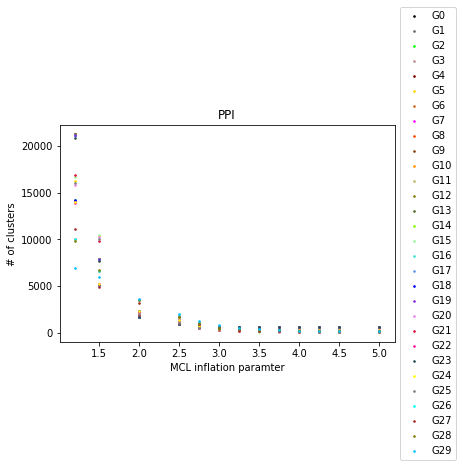

In [15]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['k','dimgray','lime','rosybrown','maroon','gold',
            'chocolate', 'fuchsia','orangered','saddlebrown',
            'darkorange','darkkhaki','olive','darkolivegreen',
            'chartreuse','palegreen','turquoise','cornflowerblue','blue',
            'blueviolet','violet','crimson','deeppink',
            'darkslategray','yellow','gray','cyan','brown','olive',
            'deepskyblue'
            ]
#,'pink','lightcoral','darkgray',

for graphlet in range(30):
    ax1.scatter(inflations, ppi_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))


#ax1.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax1.set_ylabel('# of clusters')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('PPI')
plt.show()

In [ ]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
for graphlet in range(9):
    ax1.scatter(inflations, ppi_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))

ax1.set_yscale('log')

plt.legend(loc='lower right');
#ax1.set_ylabel('Log of # of nodes in largest cluster')
ax1.set_ylabel('Log of # of clusters')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('PPI')
plt.show()

In [ ]:
inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
#,'pink','lightcoral','darkgray',

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12, 12))
for graphlet in range(9):
    ax1.scatter(inflations, ppi_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    ax2.scatter(inflations, ppi_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))


ax1.set_yscale('log')
ax2.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 1));
ax1.set_ylabel('# of nodes in largest cluster')
ax1.set_xlabel('Huri MCL inflation paramter')
ax1.set_title('4 Node Graphlet Clustering in PPI')
ax2.set_ylabel('Log of # of clusters')
ax2.set_xlabel('MCL inflation paramter')
plt.show()

Number of Clusters Graph

In [ ]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['b','r','g','c','brown','y','k','m','slategray']
for graphlet in range(9):
    ax1.scatter(inflations, ppi_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))

ax1.set_yscale('log')

plt.legend(loc='lower right');
ax1.set_ylabel('Log of # of clusters')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('PPI')
plt.show()

In [ ]:
str_inflations = ['1.2', '1.5', '2.0', '2.5', '2.75', '3.0', '3.25', '3.5', '3.75', '4.0', '4.25', '4.5', '5.0']
str_graphlets = ['G0','G1','G2','G3','G4','G5','G6','G7','G8']
make_df(ppi_largest_cluster_lengths,str_inflations,str_graphlets,'Largest Cluster Lengths')

### HuRI

In [22]:
interact = 'huri'
outdir_beginning = '../summer-2022/huri_out/'

huri_largest_cluster_lengths = []
huri_number_of_clusters = []
inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]

for graphlet in list(range(30)):
    ith_graphlet_lengths = []
    ith_cluster_lengths = []
    for inflation in inflations:
        #print("Graphlet: " +str(graphlet)+ "   Inflation: "+str(inflation))
        
        access_file = outdir_beginning + 'G' + str(graphlet) + '/intermed_G' +str(graphlet)+ '.txt'
        new_file_name = outdir_beginning + 'inflation_tests/' + 'G' + str(graphlet) + '_I' + str(inflation)
        
        
        if os.path.exists(new_file_name) == False:
            #print("Running mcl for inflation "+str(inflation))
            os.system("mcl " +access_file+ " -I "+str(inflation)+" --abc -o " +new_file_name)
        

        list_of_lists = []
        cluster_num = 0
        Gi = open(new_file_name, "r")
        for line in Gi:
            cluster_num += 1
            stripped_line = line.strip()
            line_list = stripped_line.split()
            list_of_lists.append(line_list)
        Gi.close()

        largest_cluster_lenth = len(list_of_lists[0])
        ith_graphlet_lengths.append(largest_cluster_lenth)

        ith_cluster_lengths.append(cluster_num)
    huri_largest_cluster_lengths.append(ith_graphlet_lengths)
    huri_number_of_clusters.append(ith_cluster_lengths)
        

In [ ]:
str_inflations = list_of_strings(inflations)
str_graphlets = list_of_strings(list(range(30)),prefix='G')
make_df(huri_largest_cluster_lengths,str_inflations,str_graphlets,'Largest Cluster Lengths')

Largest Cluster Graph

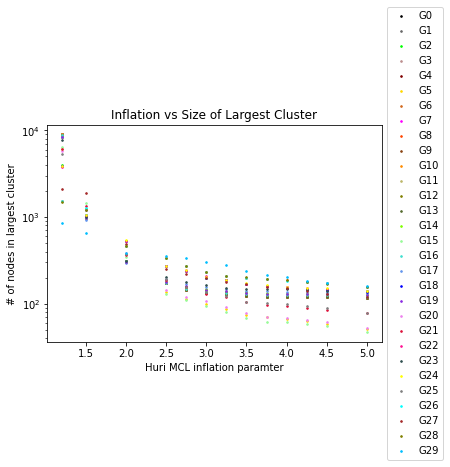

In [23]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['k','dimgray','lime','rosybrown','maroon','gold',
            'chocolate', 'fuchsia','orangered','saddlebrown',
            'darkorange','darkkhaki','olive','darkolivegreen',
            'chartreuse','palegreen','turquoise','cornflowerblue','blue',
            'blueviolet','violet','crimson','deeppink',
            'darkslategray','yellow','gray','cyan','brown','olive',
            'deepskyblue'
            ]
#,'pink','lightcoral','darkgray',

for graphlet in range(30):
    ax1.scatter(inflations, huri_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))


ax1.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax1.set_ylabel('# of nodes in largest cluster')
ax1.set_xlabel('Huri MCL inflation paramter')
ax1.set_title('Inflation vs Size of Largest Cluster')
plt.show()

In [ ]:
plt.imshow(np.log(huri_largest_cluster_lengths))

In [ ]:
# Full Plot


inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['k','dimgray','lime','rosybrown','maroon','gold',
            'chocolate', 'fuchsia','orangered','saddlebrown',
            'darkorange','darkkhaki','olive','darkolivegreen',
            'chartreuse','palegreen','turquoise','cornflowerblue','blue',
            'blueviolet','violet','crimson','deeppink',
            'darkslategray','yellow','gray','cyan','brown','olive',
            'deepskyblue'
            ]
#,'pink','lightcoral','darkgray',

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12, 12))
for graphlet in range(30):
    ax1.scatter(inflations, huri_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))
    ax2.scatter(inflations, huri_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))


ax1.set_yscale('log')
ax2.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 1));
ax1.set_ylabel('# of nodes in largest cluster')
ax1.set_xlabel('Huri MCL inflation paramter')
ax1.set_title('5 Node Graphlet Clustering in HuRI')
ax2.set_ylabel('Log of # of clusters')
ax2.set_xlabel('MCL inflation paramter')
plt.show()

In [ ]:
inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
#,'pink','lightcoral','darkgray',

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(12, 12))
for graphlet in range(9):
    ax1.scatter(inflations, huri_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    ax2.scatter(inflations, huri_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))


ax1.set_yscale('log')
ax2.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 1));
ax1.set_ylabel('# of nodes in largest cluster')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('4 Node Graphlet Clustering in HuRI')
ax2.set_ylabel('Log of # of clusters')
ax2.set_xlabel('MCL inflation paramter')
plt.show()

Number of Clusters Graph

In [ ]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['k','dimgray','lime','rosybrown','maroon','gold',
            'chocolate', 'fuchsia','orangered','saddlebrown',
            'darkorange','darkkhaki','olive','darkolivegreen',
            'chartreuse','palegreen','turquoise','cornflowerblue','blue',
            'blueviolet','violet','crimson','deeppink',
            'darkslategray','yellow','gray','cyan','brown','olive',
            'deepskyblue'
            ]
for graphlet in range(30):
    ax1.scatter(inflations, huri_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))

ax1.set_yscale('log')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
ax1.set_ylabel('Log of # of clusters')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('Huri Inflation vs Number of Clusters')
plt.show()

In [ ]:
make_df(huri_number_of_clusters,str_inflations,list_of_strings(list(range(30))),'Huri Number of Clusters')

### All Pathway Commons

In [ ]:
interact = 'apc'
outdir_beginning = '../summer-2022/apc_out/'

apc_largest_cluster_lengths = []
apc_number_of_clusters = []
inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]

for graphlet in [0,1,2,3,4,5,6,7,8]:
    ith_graphlet_lengths = []
    ith_cluster_lengths = []
    for inflation in inflations:
        #print("Graphlet: " +str(graphlet)+ "   Inflation: "+str(inflation))
        
        access_file = outdir_beginning + 'G' + str(graphlet) + '/intermed_G' +str(graphlet)+ '.txt'
        new_file_name = outdir_beginning + 'inflation_tests/' + 'G' + str(graphlet) + '_I' + str(inflation)
        
        
        if os.path.exists(new_file_name) == False:
            print("Running mcl for inflation "+str(inflation))
            os.system("mcl " +access_file+ " -I "+str(inflation)+" --abc -o " +new_file_name)
        

        list_of_lists = []
        cluster_num = 0
        Gi = open(new_file_name, "r")
        for line in Gi:
            cluster_num += 1
            stripped_line = line.strip()
            line_list = stripped_line.split()
            list_of_lists.append(line_list)
        Gi.close()

        largest_cluster_lenth = len(list_of_lists[0])
        ith_graphlet_lengths.append(largest_cluster_lenth)

        ith_cluster_lengths.append(cluster_num)
    apc_largest_cluster_lengths.append(ith_graphlet_lengths)
    apc_number_of_clusters.append(ith_cluster_lengths)

In [ ]:
apc_largest_cluster_lengths

In [ ]:
apc_number_of_clusters

Largest Cluster Graph

In [ ]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
for graphlet in range(9):
    ax1.scatter(inflations, apc_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))

ax1.set_yscale('log')

plt.legend(loc='upper right');
ax1.set_ylabel('Log of # of nodes in largest cluster')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('All Pathway Commons')
plt.show()

Number of Clusters Graph

In [ ]:
# Full Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
for graphlet in range(9):
    ax1.scatter(inflations, apc_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker=".", label='G'+str(graphlet))

ax1.set_yscale('log')

plt.legend(loc='lower right');
ax1.set_ylabel('Log of # of clusters')
ax1.set_xlabel('MCL inflation paramter')
ax1.set_title('All Pathway Commons')
plt.show()

### Six Graphs

In [ ]:
inflations = [1.2, 1.5, 2.0, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 5.0]
colors = ['purple','r','blue','c','m','orangered','k','deeppink','lime']
#,'pink','lightcoral','darkgray',

fig, (apc1, ppi1, huri1, apc2, ppi2, huri2) = plt.subplots(2, 3,figsize=(12, 12))

for graphlet in range(9):
    apc1.scatter(inflations, apc_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    apc2.scatter(inflations, apc_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    ppi1.scatter(inflations, ppi_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    ppi2.scatter(inflations, ppi_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    huri1.scatter(inflations, huri_largest_cluster_lengths[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))
    huri2.scatter(inflations, huri_number_of_clusters[graphlet], s=10, c=colors[graphlet], marker="o", label='G'+str(graphlet))

apc1.set_yscale('log')
apc2.set_yscale('log')
ppi1.set_yscale('log')
ppi2.set_yscale('log')
huri1.set_yscale('log')
huri2.set_yscale('log')


plt.legend(loc='center left', bbox_to_anchor=(1, 1));
apc1.set_ylabel('# of nodes in largest cluster')
apc1.set_xlabel('Huri MCL inflation paramter')

ppi1.set_ylabel('# of nodes in largest cluster')
ppi1.set_xlabel('Huri MCL inflation paramter')

huri1.set_ylabel('# of nodes in largest cluster')
huri1.set_xlabel('Huri MCL inflation paramter')


apc2.set_ylabel('Log of # of clusters')
apc2.set_xlabel('MCL inflation paramter')

ppi2.set_ylabel('Log of # of clusters')
ppi2.set_xlabel('MCL inflation paramter')

huri2.set_ylabel('Log of # of clusters')
huri2.set_xlabel('MCL inflation paramter')
plt.show()

## ARI

### HuRI

In [4]:
G_initial = '../summer-2022/data/interactomes/PP-Pathways_ppi.csv'
Gi = pd.read_csv(G_initial, delimiter=',')
list_of_rows = [list(row) for row in Gi.values]
list_of_rows.insert(0, Gi.columns.to_list())
df_tuples = [tuple(x) for x in list_of_rows]
G = nx.from_edgelist(df_tuples)
# list_of_lists = []
# Gi = open(G_initial, "r")
# for line in Gi:
# 	stripped_line = line.strip()
# 	line_list = stripped_line.split()
# 	list_of_lists.append(line_list)
# Gi.close()
# G = nx.from_edgelist(list_of_lists)
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='ID')
G.remove_edges_from(nx.selfloop_edges(G))
ppi_nodes = list(range(nx.number_of_nodes(G)))

In [144]:
ppi_all_clusters = []
ppi_cluster_sizes = []
for i in range(30):

    G_initial = '../summer-2022/ppi_out/inflation_tests/G'+str(i)+'_I3.25'
    ith_clusters = []
    node_list = []
    ith_cluster_sizes = []

    Gi = open(G_initial, "r")
    for line in Gi:
        stripped_line = line.strip()
        line_list = stripped_line.split()
        ith_clusters.append(line_list)
        ith_cluster_sizes.append(len(line_list))
        for j in line_list:
            node_list.append(int(j))
    Gi.close()

    stragglers = list(set(ppi_nodes) - set(node_list))
    
    for k in stragglers:
       ith_clusters.append([k])

    #add all the nodes taken off by the graphlet step
    ppi_all_clusters.append(ith_clusters)
    ppi_cluster_sizes.append(ith_cluster_sizes)

In [152]:
node_counts = []
for i in range(30):
    ith_count = 0
    for j in range(len(ppi_all_clusters[i])):
        for k in range(len(ppi_all_clusters[i][j])):
            ith_count += 1
    node_counts.append(ith_count)

In [174]:
node_counts[16]

21559

### Jaccard Index

In [145]:
g_zero,g_eight = ppi_all_clusters[16],ppi_all_clusters[15]

In [178]:
def remove_uncommon_nodes(u,v):

    u_node_list = []
    v_node_list = []

    for cluster in u:
        for node in cluster:
            u_node_list.append(node)
    for cluster in v:
        for node in cluster:
            v_node_list.append(node)

    common_nodes = list(set(v_node_list) - set(u_node_list))

    return(common_nodes,u_node_list,v_node_list)

    # new_u = []
    # new_v = []

    # len_u = 0
    # len_v = 0

    # for i in range(len(u)):
    #     new_u.append([])
    #     for node in u[i]:
    #         if node in common_nodes:
    #             new_u[i].append(node)
    #             len_u += 1
    # for i in range(len(v)):
    #     new_v.append([])
    #     for node in v[i]:
    #         if node in common_nodes:
    #             new_v[i].append(node)
    #             len_v += 1

In [179]:
common_nodes,u_node_list,v_node_list=remove_uncommon_nodes(g_zero,g_eight)

In [186]:
common_nodes.sort()

TypeError: '<' not supported between instances of 'str' and 'int'

In [75]:
def jacc(u,v):
    set_u = set(u)
    set_v = set(v)
    
    total = set_u | set_v
    intersect = set_u.intersection(set_v)
    #return len(intersect)
    return len(intersect)/len(total)
    

In [112]:
len_zero,len_eight = len(g_zero),len(g_eight)
P = np.zeros(len_zero*len_eight).reshape(len_zero,len_eight)

for i in range(len_zero):
    for j in range(len_eight):
        P[i][j] = round(jacc(g_zero[i],g_eight[j]),3)

In [ ]:
16,17 - 0.85, 0.51
16,15 - 0.85, 0.41
0,29 - 0.16057922035629613, 0.02709
0,1 - 1.0

In [110]:
pd.DataFrame(P).to_csv('ppi_jaccard_16_15.csv')

In [125]:
ari_step1 = []
ari_step2 = []
for i in range(30):

    ari_step1.append([])
    ari_step2.append([])

    for j in range(len(ppi_all_clusters[i])-1):
        for k in ppi_all_clusters[i][j]:
            ari_step1[i].append([int(k),j])

    ari_step1[i].sort()

    for j in ari_step1[i]:
        ari_step2[i].append(str(j[1]))

In [134]:
round(adjusted_rand_score(ari_step2[16],ari_step2[17]),3)

0.177

In [52]:
from sklearn.metrics import f1_score

In [54]:
P = np.zeros(30*30).reshape(30,30)
for i in range(30):
    for j in range(30):
        P[i][j] = round(adjusted_rand_score(ari_step2[i],ari_step2[j]),3)
        #P[i][j] = round(f1_score(ari_step2[i],ari_step2[j],average='micro'),3)

In [51]:
f1_score(ari_step2[16],ari_step2[17],average='micro')

0.02180165135912422

In [55]:
str_graphlets = list_of_strings(list(range(30)))
make_df(P,str_graphlets,str_graphlets,'PPI F-scores').to_csv('ppi_fscore_micro.csv')

PPI F-scores


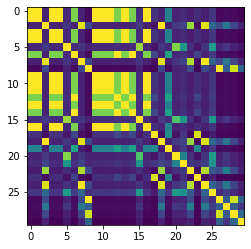

In [20]:
plt.imshow(P)

In [ ]:
#cluster_sizes[2][:8]
plt.scatter(cluster_sizes[18][:15],list(range(15)))

## Edges Missing

In [81]:
ppi_edges = 338636
for i in range(30):
    ith_edgelist = []
    intermed = open('../summer-2022/ppi_out/G'+str(i)+'/intermed_G'+str(i)+'.txt', "r")
    for line in intermed:
        intermed_stripped_line = line.strip()
        intermed_line_list = intermed_stripped_line.split()
        ith_edgelist.append(intermed_line_list)
    intermed.close()
    ith_edges = len(ith_edgelist)
    edge_difference = ppi_edges-ith_edges
    edge_percent = round(float(ith_edges)/float(ppi_edges)*100,2)
    print('Graphlet ' + str(i) + ': ' + str(edge_difference) + ' edges removed or ' + str(edge_percent) + ' percent left.')

Graphlet 0: 0 edges removed or 100.0 percent left.
Graphlet 1: 22 edges removed or 99.99 percent left.
Graphlet 2: 60533 edges removed or 82.12 percent left.
Graphlet 3: 29 edges removed or 99.99 percent left.
Graphlet 4: 102 edges removed or 99.97 percent left.
Graphlet 5: 9057 edges removed or 97.33 percent left.
Graphlet 6: 768 edges removed or 99.77 percent left.
Graphlet 7: 61440 edges removed or 81.86 percent left.
Graphlet 8: 121900 edges removed or 64.0 percent left.
Graphlet 9: 32 edges removed or 99.99 percent left.
Graphlet 10: 32 edges removed or 99.99 percent left.
Graphlet 11: 258 edges removed or 99.92 percent left.
Graphlet 12: 791 edges removed or 99.77 percent left.
Graphlet 13: 15 edges removed or 100.0 percent left.
Graphlet 14: 800 edges removed or 99.76 percent left.
Graphlet 15: 6541 edges removed or 98.07 percent left.
Graphlet 16: 170 edges removed or 99.95 percent left.
Graphlet 17: 2158 edges removed or 99.36 percent left.
Graphlet 18: 60609 edges removed or 

In [ ]:
huri_edges = 63242
for i in range(30):
    ith_edgelist = []
    intermed = open('../summer-2022/huri_out/G'+str(i)+'/intermed_G'+str(i)+'.txt', "r")
    for line in intermed:
        intermed_stripped_line = line.strip()
        intermed_line_list = intermed_stripped_line.split()
        ith_edgelist.append(intermed_line_list)
    intermed.close()
    ith_edges = len(ith_edgelist)
    edge_difference = huri_edges-ith_edges
    edge_percent = round(float(ith_edges)/float(huri_edges)*100,2)
    print('Graphlet ' + str(i) + ': ' + str(edge_difference) + ' edges removed or ' + str(edge_percent) + ' percent left.')

## Beginning Scraps

In [ ]:
nx.degree_histogram(nx.karate_club_graph())

In [ ]:
g = '../summer-2022/data/interactomes/PP-Pathways_ppi.csv'
df = pd.read_csv(g, delimiter=',')
list_of_rows = [list(row) for row in df.values]
list_of_rows.insert(0, df.columns.to_list())
df_tuples = [tuple(x) for x in list_of_rows]
ndf = nx.from_edgelist(df_tuples)

In [ ]:
num_edges = nx.number_of_edges(ndf)
num_nodes = nx.number_of_nodes(ndf)

In [ ]:
print(num_edges,num_nodes)
print(nx.density(ndf))

In [ ]:
ndf_hist = nx.degree_histogram(ndf)
short_hist = ndf_hist[0:60]
matplotlib.pyplot.hist(short_hist,bins=100);

In [ ]:
for i in range(1):
    print(i)

In [ ]:
g = input("Which: ")


In [ ]:
g

In [ ]:
import os

In [ ]:
os.system("mcl Desktop/summer-2022/data/interactomes/All_Pathway_Commons.txt --abc -o jupyter_mcl_practice")

In [ ]:
test = {'weight': 1.0}

In [ ]:
weight_text = str(test)
weight_list = weight_text.split()
last_weight = weight_list[1]
weight = last_weight[:-1]

In [ ]:
print(weight)